In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Data/"

In [ ]:
df = pd.read_csv(f"{DATA_PATH}titanic.csv")
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   gender       1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


# 결측치 다루기

In [ ]:
df.isnull() # 결측치일 경우 True

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,True,False,False,False,False,True,False


- 컬럼별로 결측치 개수 확인하기

In [ ]:
df.isnull().sum()

passengerid       0
survived          0
pclass            0
name              0
gender            0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

- 시리즈에서 인덱스 가져오기

In [ ]:
df.isnull().sum().index

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

- 시리즈에서 값들만 가져오기

In [ ]:
df.isnull().sum().values

array([   0,    0,    0,    0,    0,  263,    0,    0,    0,    1, 1014,
          2])

- 행에 결측치가 하나라도 있으면 삭제하기

In [ ]:
df.dropna() #how="any" < == 기본값

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
1296,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
1298,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


- 행에 모든값이 결측치라면 삭제하기

In [ ]:
df.dropna(how="all")

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


- 최빈값으로 결측치 채우기

In [ ]:
mode_value = df["embarked"].mode()[0] # 최빈값
df["embarked"] = df["embarked"].fillna(mode_value)

In [ ]:
#결측치가 너무 많을때 'cabin'
df["cabin"] = df["cabin"].fillna("UNK")

In [ ]:
median_value = df["fare"].median()
df["fare"] = df["fare"].fillna(median_value)

In [ ]:
median_age = df["age"].median()
df["age"] = df["age"].fillna(median_age)

In [ ]:
df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
gender         0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

# 전처리과정 필요한 메소드들
## 특정 값들 포함 여부

- `isin` 메소드

In [ ]:
lst = ["S","C"]
mask = df["embarked"].isin(lst) # S이거나 C인 항구를 보고싶을때
df.loc[mask]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,UNK,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S
1307,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,UNK,S


## 타입 변환하기
- `astype` 메소드

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   gender       1309 non-null   object 
 5   age          1309 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1309 non-null   float64
 10  cabin        1309 non-null   object 
 11  embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
df["age"] = df["age"].astype("int")
df["age"]

0       22
1       38
2       26
3       35
4       35
        ..
1304    28
1305    39
1306    38
1307    28
1308    28
Name: age, Length: 1309, dtype: int64

In [ ]:
df["embarked"].astype("category")

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: embarked, Length: 1309, dtype: category
Categories (3, object): ['C', 'Q', 'S']

## 문자열 데이터 다루기
- object 타입의 하위속성인 `str`을 이용하여 다양한 문자열 관련 메소드를 사용할 수 있다.

In [ ]:
df["ticket"].str.strip() # 앞뒤 공백제거

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: ticket, Length: 1309, dtype: object

In [ ]:
df["ticket"].str.replace("/","_") # regex = True <= 정규표현식 옵션

0                A_5 21171
1                 PC 17599
2         STON_O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON_O.Q. 3101262
1307                359309
1308                  2668
Name: ticket, Length: 1309, dtype: object

In [ ]:
df['ticket'].str.split() # 문자열 나누기

0                [A/5, 21171]
1                 [PC, 17599]
2         [STON/O2., 3101282]
3                    [113803]
4                    [373450]
                ...          
1304             [A.5., 3236]
1305              [PC, 17758]
1306    [SOTON/O.Q., 3101262]
1307                 [359309]
1308                   [2668]
Name: ticket, Length: 1309, dtype: object

In [ ]:
df["name"].str.split(".",expand=True) # 데이터프레임 형태로 반환

,0,1,2
0,"Braund, Mr",Owen Harris,None
1,"Cumings, Mrs",John Bradley (Florence Briggs Thayer),None
2,"Heikkinen, Miss",Laina,None
3,"Futrelle, Mrs",Jacques Heath (Lily May Peel),None
4,"Allen, Mr",William Henry,None
...,...,...,...
1304,"Spector, Mr",Woolf,None
1305,"Oliva y Ocana, Dona",Fermina,None
1306,"Saether, Mr",Simon Sivertsen,None
1307,"Ware, Mr",Frederick,None


In [ ]:
df["name"].str.len() # 문자열 길이 측정

0       23
1       51
2       22
3       44
4       24
        ..
1304    18
1305    28
1306    28
1307    19
1308    24
Name: name, Length: 1309, dtype: int64

In [ ]:
df["name"].str[::-1] # 문자열 슬라이싱

0                                 sirraH newO .rM ,dnuarB
1       )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                  aniaL .ssiM ,nenikkieH
3            )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                                yrneH mailliW .rM ,nellA
                              ...                        
1304                                   flooW .rM ,rotcepS
1305                         animreF .anoD ,anacO y avilO
1306                         nestreviS nomiS .rM ,rehteaS
1307                                  kcirederF .rM ,eraW
1308                             J leahciM .retsaM ,reteP
Name: name, Length: 1309, dtype: object

In [ ]:
df["name"].str.lower() # 소문자로 변환 ,upper <== 대문자

0                                 braund, mr. owen harris
1       cumings, mrs. john bradley (florence briggs th...
2                                  heikkinen, miss. laina
3            futrelle, mrs. jacques heath (lily may peel)
4                                allen, mr. william henry
                              ...                        
1304                                   spector, mr. woolf
1305                         oliva y ocana, dona. fermina
1306                         saether, mr. simon sivertsen
1307                                  ware, mr. frederick
1308                             peter, master. michael j
Name: name, Length: 1309, dtype: object

# 피벗 테이블 사용해보기
- `pd.pivot_table`
- 데이터를 기준이 되는 컬럼을 집계하여 새롭게 표형택로 작성해 주는 기능
- index: 행으로 사용할 컬럼이름
- columns: 열로 사용할 컬럼이름
- values: 집계 대상 컬럼
- aggfunc: values 에 대한 집계함수
    - std, var, mean, count, sum 등등
- fill_value: NaN에 대해 채울 값

In [ ]:
df["age2"] = df["age"] // 10
df

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,UNK,S,2
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,3
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S,3
1307,1308,0,3,"Ware, Mr. Frederick",male,28,0,0,359309,8.0500,UNK,S,2


- 나이대별 운임료의 평균?
    - `group by age2`

In [ ]:
tmp = pd.pivot_table(
    df, # 대상이 되는 데이터프레임
    index = "age2",
    values = "fare",
    aggfunc = "mean"
)
tmp

,fare
age2,
0,29.310059
1,31.713172
2,23.742729
3,41.286781
4,42.396421
5,62.642201
6,69.926825
7,37.147629
8,30.000000


In [ ]:
tmp.reset_index()

,age2,fare
0,0,29.310059
1,1,31.713172
2,2,23.742729
3,3,41.286781
4,4,42.396421
5,5,62.642201
6,6,69.926825
7,7,37.147629
8,8,30.000000


- 각 나이대에서 pclass 별로 생존률을 알고 싶다면?
    - group by age2, pclass 와 비슷한 효과

In [ ]:
tmp = pd.pivot_table(
    df,
    index="age2",
    columns="pclass",
    values="survived",
    aggfunc="mean",
    # fill_value = 0 # 결측치 채우기
)
tmp

pclass,1,2,3
age2,,,
0,0.500000,0.909091,0.446429
1,0.772727,0.482759,0.315217
2,0.560440,0.377358,0.258537
3,0.694444,0.375000,0.260417
4,0.500000,0.387097,0.119048
5,0.521739,0.294118,0.000000
6,0.428571,0.285714,0.250000
7,0.250000,0.000000,0.000000
8,1.000000,NaN,NaN


In [ ]:
tmp.reset_index()

pclass,age2,1,2,3
0,0,0.500000,0.909091,0.446429
1,1,0.772727,0.482759,0.315217
2,2,0.560440,0.377358,0.258537
3,3,0.694444,0.375000,0.260417
4,4,0.500000,0.387097,0.119048
5,5,0.521739,0.294118,0.000000
6,6,0.428571,0.285714,0.250000
7,7,0.250000,0.000000,0.000000
8,8,1.000000,NaN,NaN


- 각 나이대에 대하여 pclass 별 운임료에 대한 표준편차와 평균을 보고싶다면?

In [ ]:
tmp = pd.pivot_table(
    df,
    index="age2",
    columns = "pclass",
    values = "fare",
    aggfunc = ["std","mean"]
)
tmp

std                              mean                      
pclass           1          2          3           1          2          3
age2                                                                      
0        32.998005   7.607598   9.931735  129.864575  29.064209  22.224177
1        79.479218  20.687895  12.061098  112.567614  25.605890  14.303536
2        68.631329  14.350426  11.735901   80.267215  19.864858  12.199623
3       103.214742  10.006333   9.016939   99.668982  19.281575  12.170268
4        61.179262  13.642985  11.209306   71.201616  23.259542  13.999305
5        84.418283   6.151467   2.601784   87.932063  16.433824   8.672029
6        88.146400  11.352616   3.571085   98.361510  19.148214   9.507300
7        20.165309        NaN   0.017678   58.502100  10.500000   7.762500
8              NaN        NaN        NaN   30.000000        NaN        NaN

In [ ]:
tmp.columns 

MultiIndex([( 'std', 1),
            ( 'std', 2),
            ( 'std', 3),
            ('mean', 1),
            ('mean', 2),
            ('mean', 3)],
           names=[None, 'pclass'])

- 다중 컬럼을 단일 컬럼으로 바꾸기

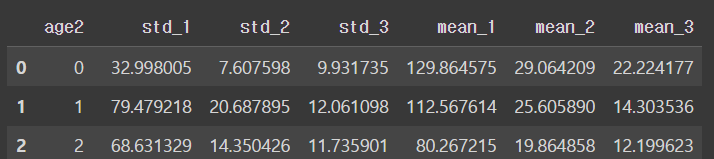

In [ ]:
for v1,v2 in tmp.columns:
    print(v1,v2)

std 1
std 2
std 3
mean 1
mean 2
mean 3


In [ ]:
# 언패킹 리스트 컴프리헨션
tmp.columns = [f"{v1}_{v2}"for v1,v2 in tmp.columns] 

In [ ]:
tmp

,std_1,std_2,std_3,mean_1,mean_2,mean_3
age2,,,,,,
0,32.998005,7.607598,9.931735,129.864575,29.064209,22.224177
1,79.479218,20.687895,12.061098,112.567614,25.605890,14.303536
2,68.631329,14.350426,11.735901,80.267215,19.864858,12.199623
3,103.214742,10.006333,9.016939,99.668982,19.281575,12.170268
4,61.179262,13.642985,11.209306,71.201616,23.259542,13.999305
5,84.418283,6.151467,2.601784,87.932063,16.433824,8.672029
6,88.146400,11.352616,3.571085,98.361510,19.148214,9.507300
7,20.165309,NaN,0.017678,58.502100,10.500000,7.762500
8,NaN,NaN,NaN,30.000000,NaN,NaN


- 나이대별 pclass의 최빈값을 pivot table로 구현

In [ ]:
tmp = pd.pivot_table(
    df,
    index="age2",
    values = "pclass",
    aggfunc = lambda x : x.mode()
)
tmp

,pclass
age2,
0,3
1,3
2,3
3,3
4,1
5,1
6,1
7,1
8,1


# `groupby` 메소드 사용하기
- 데이터를 그룹화하여 집계해서 가공하는데 매우 중요
```python
DataFrame.grouby( <그룹핑 대상이 되는 컬럼> )["집계대상컬럼"].<집계메소드>()
```
- 그루핑 대상이 되는 컬럼 : 문자열 혹은 리스트로 전달

In [ ]:
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3


- 항구별 생존률

In [ ]:
df.groupby("embarked")["survived"].mean()

embarked
C    0.492593
Q    0.439024
S    0.335153
Name: survived, dtype: float64

- 항구별 운임료에 대한 표준편차

In [ ]:
df.groupby("embarked")["fare"].std()

embarked
C    84.185996
Q    13.616133
S    37.119373
Name: fare, dtype: float64

- `agg` 메소드를 이용한 방법

- 나이대별 운임료의 평균

In [ ]:
df.groupby("age2")["fare"].agg("mean").reset_index()

,age2,fare
0,0,29.310059
1,1,31.713172
2,2,23.742729
3,3,41.286781
4,4,42.396421
5,5,62.642201
6,6,69.926825
7,7,37.147629
8,8,30.000000


- groupby 결과에 대한 딕셔너리를 이용하여 집계하는 방법
```python
DataFrame.groupby(<그루핑대상컬럼>).agg(<딕셔너리>)
```
- 딕셔너리
```python
{
    "집계대상컬럼":<함수 or 문자열>
}
```

In [ ]:
df.groupby("age2").agg({"fare":"mean"}).reset_index()

,age2,fare
0,0,29.310059
1,1,31.713172
2,2,23.742729
3,3,41.286781
4,4,42.396421
5,5,62.642201
6,6,69.926825
7,7,37.147629
8,8,30.000000


- 각 나이대에 대해 pclass별 생존율을 구하라

In [ ]:
cols = ["age2","pclass"]
agg_dict = {"survived":"mean"}
tmp = df.groupby(cols).agg(agg_dict)
tmp

survived
age2 pclass          
0    1       0.500000
     2       0.909091
     3       0.446429
1    1       0.772727
     2       0.482759
     3       0.315217
2    1       0.560440
     2       0.377358
     3       0.258537
3    1       0.694444
     2       0.375000
     3       0.260417
4    1       0.500000
     2       0.387097
     3       0.119048
5    1       0.521739
     2       0.294118
     3       0.000000
6    1       0.428571
     2       0.285714
     3       0.250000
7    1       0.250000
     2       0.000000
     3       0.000000
8    1       1.000000

- 여러 컬럼에 대한 집계

In [ ]:
# 나이대별 생존률과 객실의 고유값 개수
agg_dict = {"survived":"mean", "cabin":"nunique"}

tmp = df.groupby("age2").agg(agg_dict)
tmp

,survived,cabin
age2,,
0,0.573171,8
1,0.419580,21
2,0.324547,63
3,0.426724,59
4,0.355556,47
5,0.414286,34
6,0.375000,16
7,0.142857,4
8,1.000000,1


- 집계 대상 컬럼안에서 다양하게 집계하기

In [ ]:
# 항구별 운임료의 표준편차와 평균, 객실의 다양성과 객실의 최빈값                                                               
agg_dict = {
    "fare":["std","mean"],
    "cabin":["nunique",lambda x:x.mode()]
}
tmp = df.groupby("embarked").agg(agg_dict)
tmp

fare              cabin           
                std       mean nunique <lambda_0>
embarked                                         
C         84.185996  62.336267      84        UNK
Q         13.616133  12.409012       4        UNK
S         37.119373  27.519476     105        UNK

- 집계 컬럼명 정의하기

In [ ]:
agg_dict = {
    "fare":[
        ("운임료 표준편차","std"),
        ("운임료 평균","mean")
        ],
    "cabin":[
        ("객실 다양성","nunique"),
        ("객실 최빈값",lambda x:x.mode())
        ]
}
tmp = df.groupby("embarked").agg(agg_dict)
tmp

fare             cabin       
           운임료 표준편차     운임료 평균 객실 다양성 객실 최빈값
embarked                                    
C         84.185996  62.336267     84    UNK
Q         13.616133  12.409012      4    UNK
S         37.119373  27.519476    105    UNK

In [ ]:
# 0레벨 컬럼 삭제하기
tmp.columns.droplevel()

Index(['운임료 표준편차', '운임료 평균', '객실 다양성', '객실 최빈값'], dtype='object')

In [ ]:
tmp.columns = tmp.columns.droplevel()
tmp

,운임료 표준편차,운임료 평균,객실 다양성,객실 최빈값
embarked,,,,
C,84.185996,62.336267,84,UNK
Q,13.616133,12.409012,4,UNK
S,37.119373,27.519476,105,UNK


In [ ]:
tmp.reset_index() # leftjoin전 키값 만들기

,embarked,운임료 표준편차,운임료 평균,객실 다양성,객실 최빈값
0,C,84.185996,62.336267,84,UNK
1,Q,13.616133,12.409012,4,UNK
2,S,37.119373,27.519476,105,UNK


# 데이터 프레임 병합하기

- concat
    - 수직 또는 수평으로 병합
    - `pd.concat` 함수에 데이터프레임 객체들을 리스트에 담아서 전달

In [ ]:
pd.concat([df,df]) # axis = 0 

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,UNK,S,2
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,3
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S,3
1307,1308,0,3,"Ware, Mr. Frederick",male,28,0,0,359309,8.0500,UNK,S,2


- merge
    - 자주 사용되는 메소드
    - how 인자를 통해 left or inner join을 할 수 있음.(default는 inner join)
```python
pd.merge(<left DataFrame>,<right DataFrame>,on="기준컬럼",how="left")
```

In [ ]:
features = df.copy()
features.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3


- cabin의 등장 빈도수를 특성으로 추가하고 싶다면?

In [ ]:
df["cabin"].value_counts()

UNK                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: cabin, Length: 187, dtype: int64

In [ ]:
# 병합할 데이터프레임 만들기
tmp = df["cabin"].value_counts().reset_index()
tmp.columns = ["cabin","cabin_cnt"]
tmp

,cabin,cabin_cnt
0,UNK,1014
1,C23 C25 C27,6
2,B57 B59 B63 B66,5
3,G6,5
4,F33,4
...,...,...
182,A14,1
183,E63,1
184,E12,1
185,E38,1


In [ ]:
# 병합
pd.merge(features,tmp,how="left",on="cabin") # on 생략시, 동일한 컬럼명 기준으로 merge한다.

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2,cabin_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2,1014
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2,1014
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3,1014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,UNK,S,2,1014
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,3,1
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S,3,1014
1307,1308,0,3,"Ware, Mr. Frederick",male,28,0,0,359309,8.0500,UNK,S,2,1014


- merge되는 기준 컬럼이 다수인 경우
    - list로 전달

In [ ]:
# 각 항구에 대하여 pclass별 운임료의 평균과 ticket의 다양성의 집계결과를 특성으로 추가
agg_dict = {
    "fare":"mean",
    "ticket":"nunique"
}
tmp = df.groupby(["embarked","pclass"]).agg(agg_dict)
tmp.add_prefix("feature_").reset_index()

,embarked,pclass,feature_fare,feature_ticket
0,C,1,106.845330,76
1,C,2,23.300593,20
2,C,3,11.021624,75
3,Q,1,90.000000,1
4,Q,2,11.735114,7
5,Q,3,10.390820,99
6,S,1,72.235825,113
7,S,2,21.206921,165
8,S,3,14.435460,375


In [ ]:
idx = tmp.add_prefix("feature_").reset_index()
df = pd.merge(features,idx,how="left",on=["embarked","pclass"])
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2,feature_fare,feature_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2,14.435460,375
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,106.845330,76
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2,14.435460,375
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,72.235825,113
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3,14.435460,375


# apply 메소드
- Series, DataFrame에 대한 단순 집계가 아닌 구체적인 로직을 적용하고 싶을때 사용
- 각 데이터에 대한 조건 검사와 같은 복잡한 처리 가능
- `apply`메소드에 우리가 정의한 함수를 넣으면 됨

In [ ]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'age2', 'feature_fare',
       'feature_ticket'],
      dtype='object')

- 항구별 sibsp과 parch의 합계의 평균을 구하려면?
    - agg메소드로는 못구함. agg메소드는 각 컬럼에 대해서만 집계가 가능

In [ ]:
def do_apply(x):
    return (x["sibsp"] + x["parch"]).mean()
df.groupby("embarked").apply(do_apply)

embarked
C    0.770370
Q    0.455285
S    0.974891
dtype: float64

- DataFrame에 대한 apply
    - 축개념이 있다.
    - axis = 0 : 아래방향(행방향), 컬럼 단위로 처리
    - axis = 1 : 열방향, 행단위로 처리

In [ ]:
def do_apply(x):
    print(x.shape)
    return x
tmp = df.apply(do_apply)

(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)


In [ ]:
df2 = df.head()

In [ ]:
def do_apply(x):
    print(x.shape)
    return x
tmp = df2.apply(do_apply,axis=1)

(15,)
(15,)
(15,)
(15,)
(15,)


- groupby에 대한 apply
    - 데이터프레임이 넘어간다.

In [ ]:
def do_apply(x):
    display(x)
    print("="*100) # 구분선
    return x
tmp = df.groupby("embarked").apply(do_apply)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2,feature_fare,feature_ticket
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,106.845330,76
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,UNK,C,1,23.300593,20
19,20,1,3,"Masselmani, Mrs. Fatima",female,28,0,0,2649,7.2250,UNK,C,2,11.021624,75
26,27,0,3,"Emir, Mr. Farred Chehab",male,28,0,0,2631,7.2250,UNK,C,2,11.021624,75
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,UNK,C,4,106.845330,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43,1,0,17765,27.7208,D40,C,4,106.845330,76
1296,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20,0,0,SC/PARIS 2166,13.8625,D38,C,2,23.300593,20
1298,1299,0,1,"Widener, Mr. George Dunton",male,50,1,1,113503,211.5000,C80,C,5,106.845330,76
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,3,106.845330,76


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2,feature_fare,feature_ticket
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,UNK,Q,2,10.39082,99
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,UNK,Q,0,10.39082,99
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,UNK,Q,1,10.39082,99
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28,0,0,330959,7.8792,UNK,Q,2,10.39082,99
32,33,1,3,"Glynn, Miss. Mary Agatha",female,28,0,0,335677,7.7500,UNK,Q,2,10.39082,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1288,0,3,"Colbert, Mr. Patrick",male,24,0,0,371109,7.2500,UNK,Q,2,10.39082,99
1290,1291,0,3,"Conlon, Mr. Thomas Henry",male,31,0,0,21332,7.7333,UNK,Q,3,10.39082,99
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,28,0,0,334915,7.7208,UNK,Q,2,10.39082,99
1301,1302,1,3,"Naughton, Miss. Hannah",female,28,0,0,365237,7.7500,UNK,Q,2,10.39082,99


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2,feature_fare,feature_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2,14.435460,375
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2,14.435460,375
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,72.235825,113
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3,14.435460,375
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,5,72.235825,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3,1,1,SOTON/O.Q. 3101315,13.7750,UNK,S,0,14.435460,375
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28,0,0,347086,7.7750,UNK,S,2,14.435460,375
1304,1305,0,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,UNK,S,2,14.435460,375
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S,3,14.435460,375


- 아규먼트 전달 예시

In [ ]:
age_mean = df["age"].mean()
age_mean

29.484339190221544

In [ ]:
def do_apply(x,y):
    return x["age"].mean() - age_mean # 전체 나이 평균과 그룹화되어 항구별 나이 평균의 차이
df.groupby("embarked").apply(do_apply,y = age_mean) # 추가 아규먼트를 전달사고 싶다면 키워드 아규먼트 방식으로 정의

embarked
C    1.889735
Q   -1.248567
S   -0.389361
dtype: float64

# Pandas에서 progress bar 사용하기

In [ ]:
from tqdm.auto import tqdm

In [ ]:
tqdm.pandas() # progress_apply메소드를 사용하도록 초기화

In [ ]:
import time

def do_apply(x):
    time.sleep(0.01)
    return x
tmp = df.progress_apply(do_apply,axis=1)

  0%|          | 0/1309 [00:00<?, ?it/s]

# datetime으로 변환하기
- `pd.to_datetime` 함수
- 날짜형 자료형으로 변환하였을 경우 이점
    - 년,월,일,시간 등 datetime 정보를 쉽게 추출
    - datetime 자료형의 dt라는 하위 속성을 이용하여 필요한 날짜 정보를 쉽게 가져올 수 있다.

In [ ]:
df["구매일자"] = pd.to_datetime(df["구매일자"])
df["구매일자"]

0        2007-06-26
1        2007-07-08
2        2007-07-14
3        2007-07-28
4        2007-07-28
            ...    
167460   2007-11-07
167461   2007-11-25
167462   2007-05-31
167463   2007-08-24
167464   2007-05-31
Name: 구매일자, Length: 167465, dtype: datetime64[ns]

In [ ]:
df["구매일자"].dt.year # 연도

0         2007
1         2007
2         2007
3         2007
4         2007
          ... 
167460    2007
167461    2007
167462    2007
167463    2007
167464    2007
Name: 구매일자, Length: 167465, dtype: int64

In [ ]:
df["구매일자"].dt.month # 월

0          6
1          7
2          7
3          7
4          7
          ..
167460    11
167461    11
167462     5
167463     8
167464     5
Name: 구매일자, Length: 167465, dtype: int64

In [ ]:
df["구매일자"].dt.day # 일

0         26
1          8
2         14
3         28
4         28
          ..
167460     7
167461    25
167462    31
167463    24
167464    31
Name: 구매일자, Length: 167465, dtype: int64

In [ ]:
df["구매일자"].dt.quarter # 분기

0         2
1         3
2         3
3         3
4         3
         ..
167460    4
167461    4
167462    2
167463    3
167464    2
Name: 구매일자, Length: 167465, dtype: int64

In [ ]:
df["구매일자"].dt.dayofyear # 연기준 몇일째인지

0         177
1         189
2         195
3         209
4         209
         ... 
167460    311
167461    329
167462    151
167463    236
167464    151
Name: 구매일자, Length: 167465, dtype: int64

- https://pandas.pydata.org/docs/reference/frame.html